# Lab 3: Predicting a Categorical Target and Evaluating Performance - Titanic Dataset
**Author: David Rodriguez-Mayorquin**
**Date: March 19, 2025**

### Introduction
In this project, we use classification models to predict survival on the Titanic using various input features such as age, sex, passenger class, and fare. We will train multiple classification models, evaluate their performance using key metrics (accuracy, precision, recall, F1-score), and create visualizations to interpret the results. This exercise helps us understand how different machine learning models work and how to compare their strengths and weaknesses in real-world scenarios.

## Section 1. Import and Inspect the Data
### 2.1 Load the titanic dataset fdirectly from the seaborn library for consistency and simplicity.

In [20]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

## 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data
We begin by handling missing values in the dataset. Missing values in the `age` column are imputed using the median, and missing values in the `embark_town` column are filled with the mode.

### 2.2 Feature Engineering
We create a new feature called `family_size`, encode categorical variables such as `sex` and `embarked` into numeric values, and convert the binary `alone` column to numeric as well.


In [21]:
# 2.1 Handle Missing Values (avoiding chained assignment warning)
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode().iloc[0])
titanic['embarked'] = titanic['embarked'].fillna('S')
titanic['sex'] = titanic['sex'].fillna('male')

# 2.2 Feature Engineering
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

# Quick checks after preprocessing
print("Missing values remaining:")
print(titanic[['age', 'sex', 'embarked', 'embark_town']].isnull().sum())

print("\nSample of new features:")
print(titanic[['family_size', 'sex', 'embarked', 'alone']].head())


Missing values remaining:
age            0
sex            0
embarked       0
embark_town    0
dtype: int64

Sample of new features:
   family_size  sex  embarked  alone
0            2    0         2      0
1            2    1         0      0
2            1    1         2      1
3            2    1         2      0
4            1    0         2      1


## 3. Feature Selection and Justification

### 3.1 Choose Features and Target
In this section, we select 2 or more input fatures and the target. Since this is a classification problem, we can use both categorical and numerical features. We used `survived` as the target.
Three different input scenarios are considered to evaluate how different features affect model performance:

- **Case 1:** Input feature – `alone`
- **Case 2:** Input feature – `age`
- **Case 3:** Input features – `age` and `family_size`

The **target variable is `survived`**, which indicates whether the passenger survived (1) or not (0).

### 3.2 Define `X` (features) and `y` (target)
We assign the selected input features to `X` and the target variable to `y`. Only one case is active at a time using code comments.


In [22]:
# Case 1: alone only
# X = titanic[['alone']]
# y = titanic['survived']

# Case 2: age only
# X = titanic[['age']]
# y = titanic['survived']

# Case 3: age and family_size
X = titanic[['age', 'family_size']]
y = titanic['survived']

# Show shape for confirmation
print("Feature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)


Feature matrix X shape: (891, 2)
Target vector y shape: (891,)


### Reflection 3
**Why are these features selected?**

These features were selected because they might help explain who survived. For example, being alone, age, or having family could affect a person’s chances

**Are there features that are likely to be highly predictive of survival?**

Yes, other features like sex, passenger class, and fare are also likely to help predict survival.

## 4. Train a Classification Model (Decision Tree)

In this section, we train a Decision Tree classifier to predict survival. We use StratifiedShuffleSplit to ensure the class distribution of the target variable is preserved across training and test sets.

We then evaluate the model on both the training and test data using classification metrics and visualize the results using a confusion matrix and decision tree plot.


In [23]:
# 4.1 Split the Data

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size:', len(X_train), 'Test size:', len(X_test))


Train size: 712 Test size: 179


In [24]:
# 4.2 Create and Train the Decision Tree Model

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
# 4.3 Predict and Evaluate Model Performance

# Training set evaluation
y_train_pred = tree_model.predict(X_train)
print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_train_pred))

# Test set evaluation
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       439
           1       0.59      0.52      0.55       273

    accuracy                           0.68       712
   macro avg       0.66      0.65      0.65       712
weighted avg       0.67      0.68      0.67       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       110
           1       0.54      0.57      0.55        69

    accuracy                           0.65       179
   macro avg       0.63      0.63      0.63       179
weighted avg       0.65      0.65      0.65       179



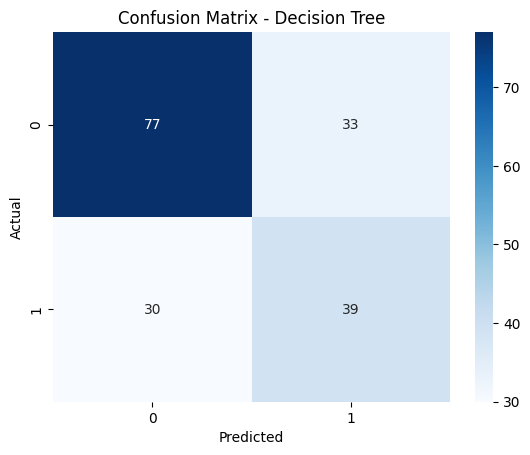

In [26]:
# 4.4 Plot Confusion Matrix as Heatmap

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


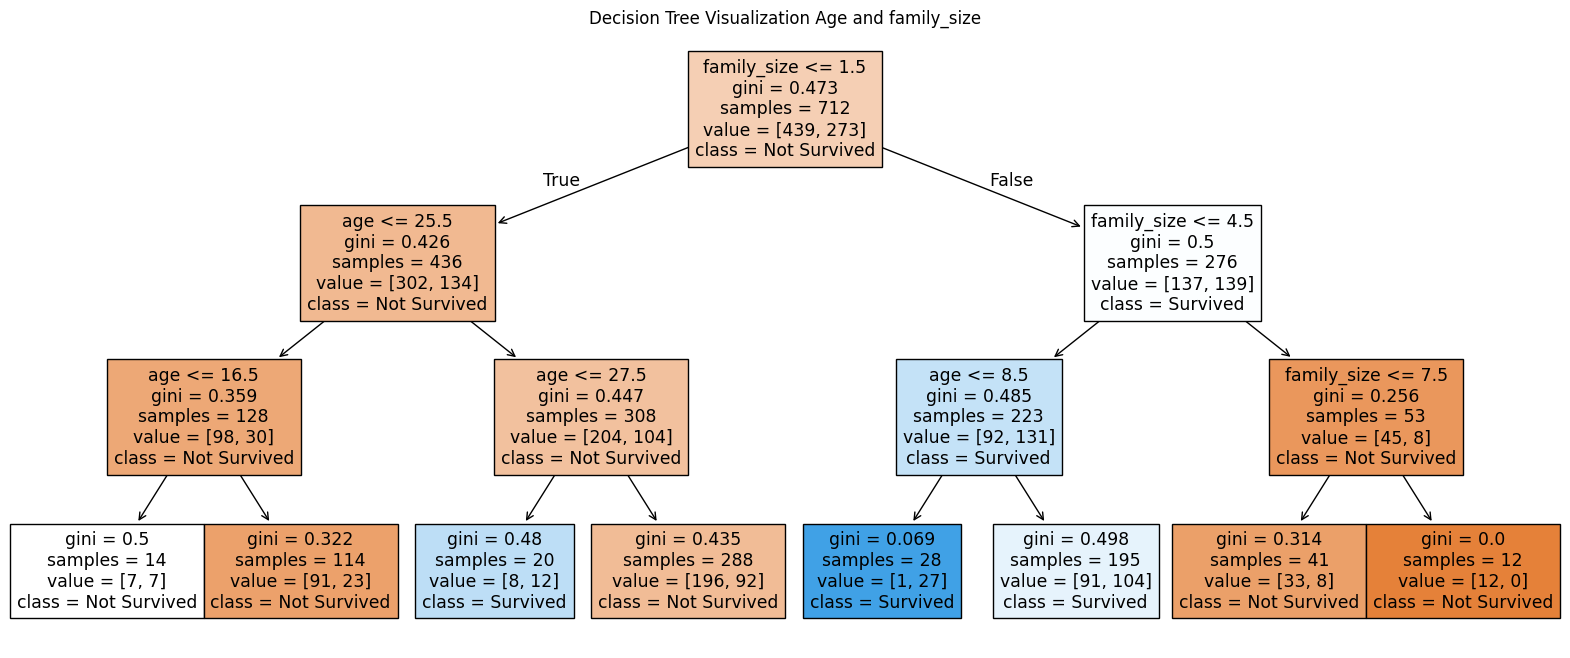

In [27]:
# 4.5 Plot and Save the Decision Tree

fig = plt.figure(figsize=(20, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree Visualization Age and family_size')
plt.show()

# Save image
fig.savefig("decision_tree_case3_age_familysize.png")

## Model Comparison Summary

| Case | Features Used         | Accuracy (Test) | Precision | Recall | F1 Score |
|------|------------------------|------------------|-----------|--------|----------|
| 1    | alone                 | 63%              | 0.64     | 0.63   | 0.63    |
| 2    | age                   | 63%              | 0.67        | 0.63    | 0.50       |
| 3    | age, family_size      | 65%              | 0.65        | 0.65     | 0.65       |


### Reflection 4:
- How well did the different cases perform?
- Are there any surprising results?
- Which inputs worked better?

The three different cases showed that adding more relevant features improves model performance. 

* Case 1 didn’t work very well because being alone is not a strong clue about survival.
* Case 2 was a little better, but age alone was not enough to make good predictions.
* Case 3 was the best. Using both age and family size helped the model do a better job.


## Section 5. Compare Alternative Models (SVC, NN)

In a Support Vector Machine, the kernel function defines how the algorithm transforms data to find a hyperplane that separates the classes. If the data is not linearly separable, changing the kernel can help the model find a better decision boundary.

In [28]:
# Test 1. RBF Kernel
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)

print("Results for SVC (RBF Kernel) on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC (RBF Kernel) on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



In [29]:
# Test 2. Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)

print("Results for SVC (Linear Kernel) on test data:")
print(classification_report(y_test, y_pred_svc))


Results for SVC (Linear Kernel) on test data:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



/Users/davidrodriguez/Projects/applied-ml-davidrm/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davidrodriguez/Projects/applied-ml-davidrm/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davidrodriguez/Projects/applied-ml-davidrm/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [30]:
# Test 3. Polynomial Kernel
svc_model_poly = SVC(kernel='poly', degree=3)
svc_model_poly.fit(X_train, y_train)
y_pred_poly = svc_model_poly.predict(X_test)
print("\nResults for SVC (Polynomial Kernel):")
print(classification_report(y_test, y_pred_poly))



Results for SVC (Polynomial Kernel):
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



/Users/davidrodriguez/Projects/applied-ml-davidrm/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davidrodriguez/Projects/applied-ml-davidrm/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davidrodriguez/Projects/applied-ml-davidrm/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [31]:
# Test 4: Sigmoid Kernel
svc_model_sigmoid = SVC(kernel='sigmoid')
svc_model_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svc_model_sigmoid.predict(X_test)
print("\nResults for SVC (Sigmoid Kernel):")
print(classification_report(y_test, y_pred_sigmoid))


Results for SVC (Sigmoid Kernel):
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       110
           1       0.42      0.45      0.43        69

    accuracy                           0.55       179
   macro avg       0.53      0.53      0.53       179
weighted avg       0.55      0.55      0.55       179



## SVC Kernel Comparison Summary

| Kernel   | Accuracy | Precision | Recall | F1 Score |
|----------|----------|-----------|--------|----------|
| RBF      | 63%      | 0.66      | 0.63   | 0.52     |
| Linear   | 61%      | 0.38        | 0.61     | 0.47       |
| Poly     | 61%      | 0.38        | 0.61     | 0.47       |
| Sigmoid  | 55%      | 0.55        | 0.55     | 0.55       |


## 5.1 Train and Evaluate Model (SVC)

First, train and SVC model using the defaut kernel.

Results for SVC (Default RBF Kernel) on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



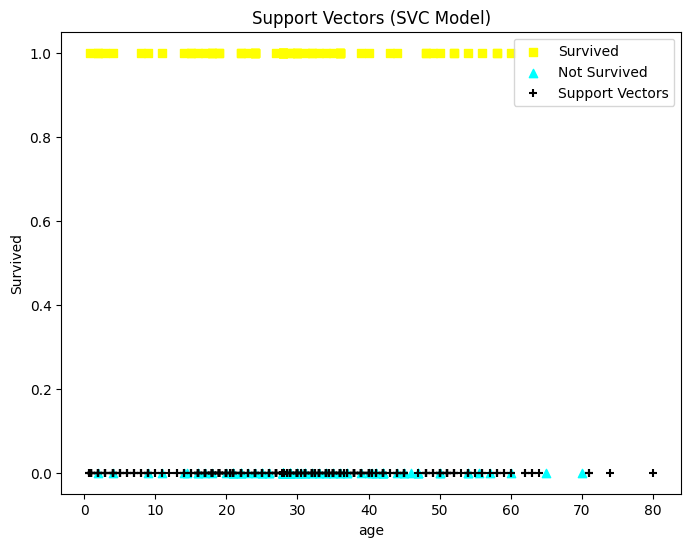

In [33]:
# Train the default SVC model (RBF kernel by default)
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predict on test data
y_pred_svc = svc_model.predict(X_test)

# Print classification report
print("Results for SVC (Default RBF Kernel) on test data:")
print(classification_report(y_test, y_pred_svc))

# Visualize Support Vectors
# Use the first feature in X for plotting
feature_name = X.columns[0]

# Separate test data by class
survived = X_test.loc[y_test == 1, feature_name]
not_survived = X_test.loc[y_test == 0, feature_name]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(survived, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]
    plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

plt.xlabel(feature_name)
plt.ylabel('Survived')
plt.title('Support Vectors (SVC Model)')
plt.legend()
plt.show()